<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment6/Audio_Embedding_Clustering_with_ImageBind_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Embedding Clustering with ImageBind LLMs

The Dataset used here is : for Audio MNIST Dataset on Kaggle

1. **Environment Setup:**
   - Ensure that you have access to a computing environment with the necessary computational resources (GPU recommended) since we'll be working with deep learning models.
   - Install necessary libraries and dependencies such as PyTorch, Transformers, and any specific packages required for ImageBind.

2. **Dataset Understanding:**
   - Acquire the Kaggle dataset for news articles. This dataset should ideally contain both text and corresponding audio files for each news article.
   - Perform an initial exploration of the dataset to understand its structure, content, and format.

3. **Data Preprocessing:**
   - Preprocess the text data: This may include tokenization, removal of stop words, and other NLP preprocessing steps.
   - Preprocess the audio data: Convert the audio into a suitable format for analysis, possibly extracting features or transforming it into a spectrogram.

4. **Feature Extraction using ImageBind:**
   - Use the ImageBind LLM to generate embeddings for both text and audio data. This step involves feeding the preprocessed data into the ImageBind model to obtain the embeddings.

5. **Clustering:**
   - Once we have the embeddings, we will apply a clustering algorithm (like K-Means, DBSCAN, etc.) to cluster the data. The choice of algorithm will depend on the dataset characteristics and the embeddings.

6. **Analysis and Interpretation:**
   - Analyze the clusters formed to understand how the news articles are grouped together. This step involves looking at the characteristics of each cluster and interpreting why certain articles are grouped together.



In [1]:
!git clone https://github.com/facebookresearch/ImageBind.git
!pip install git+https://github.com/facebookresearch/pytorchvideo.git@28fe037d212663c6a24f373b94cc5d478c8c1a1d timm==0.6.7 ftfy regex einops fvcore decord==0.6.0

Cloning into 'ImageBind'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 117 (delta 45), reused 33 (delta 32), pack-reused 50
Receiving objects: 100% (117/117), 2.64 MiB | 8.72 MiB/s, done.
Resolving deltas: 100% (51/51), done.
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 28fe037d212663c6a24f373b94cc5d478c8c1a1d) to /tmp/pip-req-build-n5j9i0vk
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-req-build-n5j9i0vk
  Running command git rev-parse -q --verify 'sha^28fe037d212663c6a24f373b94cc5d478c8c1a1d'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Running command git checkout -q 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit 28fe037d212663c6a2

In [2]:
!pip install torch

In [3]:
import pandas as pd
import os
from google.colab import files

In [4]:
uploaded = files.upload()

Saving audio_MNIST.zip to audio_MNIST.zip



### Understanding the Dataset

1. **Dataset Acquisition:**
   - Obtain the Kaggle dataset for news articles. Make sure it includes both text and audio files for each news article.
   - Load the dataset into your environment. If it's in a CSV or similar format, you can use libraries like `pandas` for this.

2. **Initial Exploration:**
   - Check the basic structure of the dataset: how many articles are there, what columns are available (like title, content, audio file paths), etc.
   - Understand the format of the audio files and ensure they are in a consistent format.


In [5]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '/content/audio_MNIST.zip'

# Directory where we will extract the contents of the zip file
extraction_directory = 'audio_MNIST/'

# Create a directory for extraction
os.makedirs(extraction_directory, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

# Listing the contents of the extracted directory
extracted_files = os.listdir(extraction_directory)
extracted_files.sort()
extracted_files


['free-spoken-digit-dataset-master']


### Data Preprocessing

1. **Text Preprocessing:**
   - Clean the text data: This includes removing special characters, unnecessary whitespace, and possibly lowercasing the text.
   - Tokenize the text: Convert the cleaned text into a format suitable for the ImageBind model.

2. **Audio Preprocessing:**
   - Standardize the audio files: Ensure all audio files have the same sampling rate and format.
   - Feature extraction from audio: Depending on the requirements of the ImageBind model, transform the audio into a suitable format, like spectrograms or feature vectors.


In [6]:
# Path to the extracted dataset directory
dataset_directory = os.path.join(extraction_directory, 'free-spoken-digit-dataset-master/')

# Listing the contents of the dataset directory
dataset_contents = os.listdir(dataset_directory)
dataset_contents.sort()
dataset_contents


['.gitignore',
 'README.md',
 '__init__.py',
 'acquire_data',
 'metadata.py',
 'pip_requirements.txt',
 'recordings',
 'utils']

In [7]:
# Path to the 'recordings' directory within the dataset
recordings_dir_path = os.path.join(dataset_directory, 'recordings')

# Listing the contents of the 'recordings' directory
recordings_contents = os.listdir(recordings_dir_path)
recordings_contents.sort()

# Displaying a subset of the contents to get an idea of the file names and types
recordings_contents[:10]  # Display the first 10 files as a sample


['0_george_0.wav',
 '0_george_1.wav',
 '0_george_10.wav',
 '0_george_11.wav',
 '0_george_12.wav',
 '0_george_13.wav',
 '0_george_14.wav',
 '0_george_15.wav',
 '0_george_16.wav',
 '0_george_17.wav']


### Step 2: Audio Preprocessing

1. **Feature Extraction from Audio:**
   - Convert the audio files into a format that is suitable for the ImageBind model. This often involves creating spectrograms from the audio files, as they are a common way to represent audio data for machine learning tasks.
   - We will preprocess a few sample audio files from your dataset to demonstrate this process.

2. **Batch Processing:**
   - After demonstrating with a few samples, you will need to apply this preprocessing to all the audio files in your dataset. This can be done in batches to manage memory usage effectively.




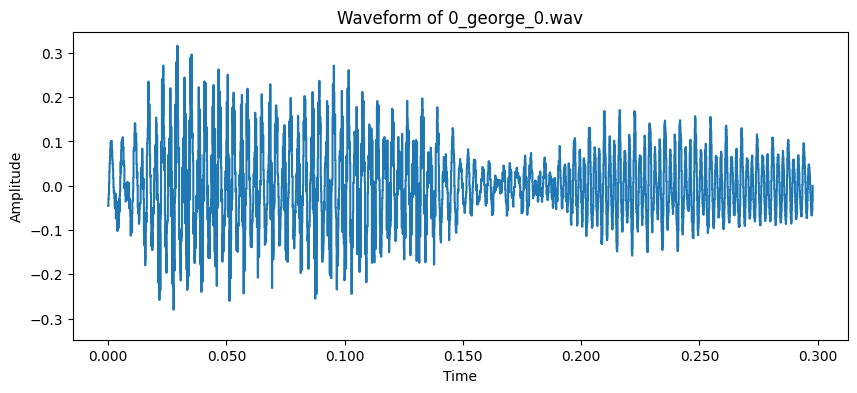

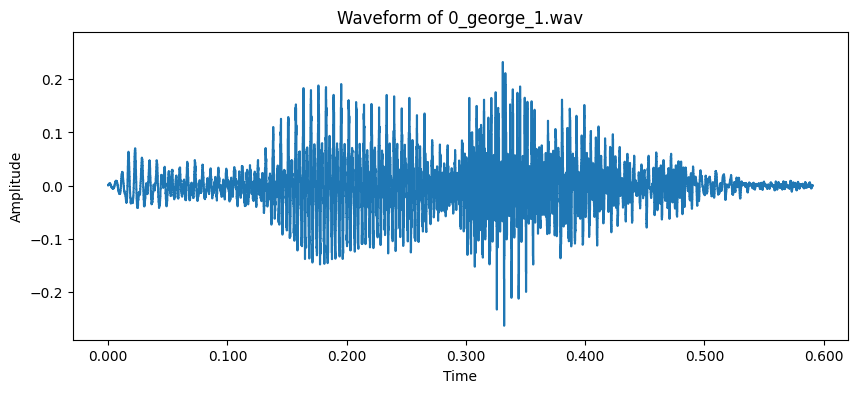

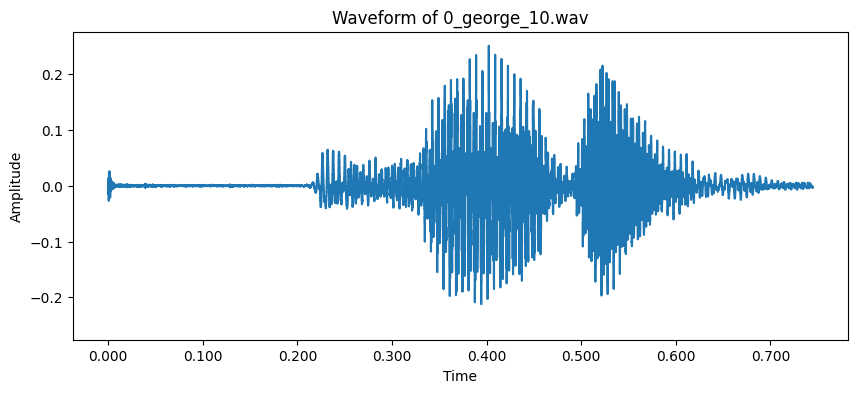

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to load and plot an audio file
def load_and_plot_audio(file_path):
    # Load the audio file
    audio, sample_rate = librosa.load(file_path, sr=None)
    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title(f"Waveform of {os.path.basename(file_path)}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

    return audio, sample_rate

# Load and plot a few sample audio files
sample_files = [os.path.join(recordings_dir_path, file) for file in recordings_contents[:3]]
audio_samples = [load_and_plot_audio(file) for file in sample_files]


In [10]:
!pip install librosa

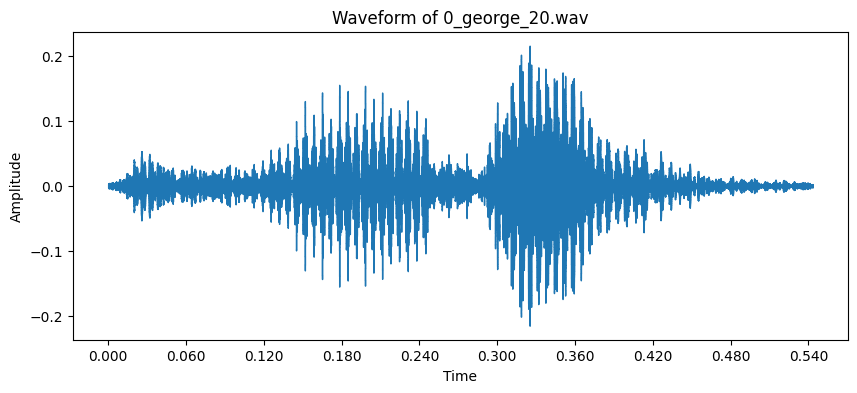

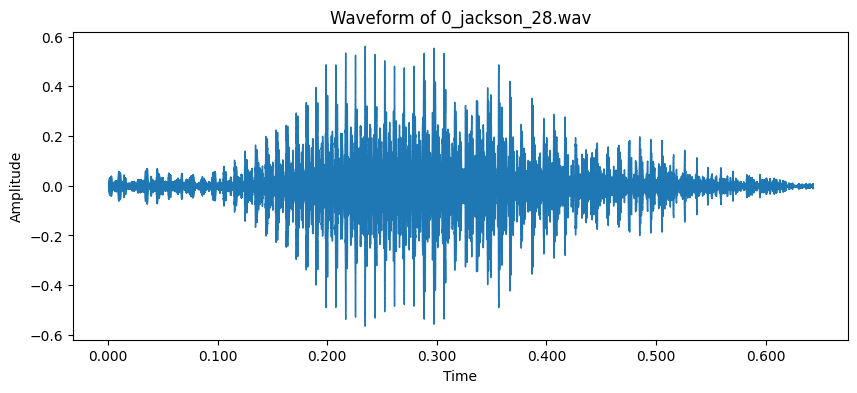

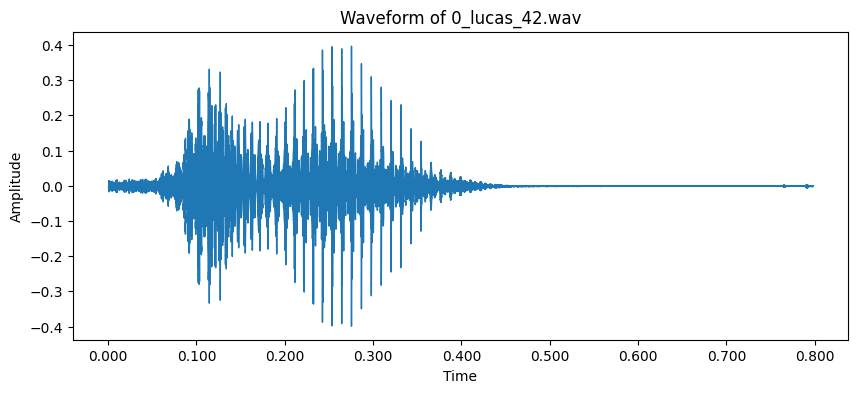

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def load_and_display_audio(file_path, sr=22050):
    audio, sample_rate = librosa.load(file_path, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title(f'Waveform of {os.path.basename(file_path)}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()
    return audio, sample_rate

# Replace 'sample_file_paths' with the paths to your actual audio files
sample_file_paths = ['/content/audio_MNIST/free-spoken-digit-dataset-master/recordings/0_george_20.wav', '/content/audio_MNIST/free-spoken-digit-dataset-master/recordings/0_jackson_28.wav', '/content/audio_MNIST/free-spoken-digit-dataset-master/recordings/0_lucas_42.wav']
for file_path in sample_file_paths:
    load_and_display_audio(file_path)


In [23]:
import librosa

def load_audio(file_path, sr=22050):
    audio, _ = librosa.load(file_path, sr=sr)
    return audio


In [13]:
def extract_features(audio, sample_rate, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    return mfcc

# Example for extracting MFCC features
audio_features = [extract_features(audio, sr) for audio, sr in audio_samples]


In [14]:
import numpy as np

def normalize_features(features):
    return (features - np.mean(features, axis=1, keepdims=True)) / np.std(features, axis=1, keepdims=True)

normalized_features = [normalize_features(feature) for feature in audio_features]


In [16]:
import os
os.chdir('/content/ImageBind')

In [19]:
%cd /content/ImageBind/

/content/ImageBind


In [20]:
import torch
from imagebind import data
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType


device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


'cuda:0'

In [22]:

# Instantiate the ImageBind model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model.to(device)


100%|██████████| 4.47G/4.47G [00:56<00:00, 84.7MB/s]


ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [42]:

# Load data
inputs = {
    ModalityType.AUDIO: data.load_and_transform_audio_data(["/content/audio_MNIST/free-spoken-digit-dataset-master/recordings/0_george_20.wav"], device),
}

In [43]:
with torch.no_grad():
    embeddings = model(inputs)

In [44]:
print(
    "Audio: ",
    torch.softmax(embeddings[ModalityType.AUDIO], dim=-1),
)

Audio:  tensor([[0.0020, 0.0013, 0.0008,  ..., 0.0007, 0.0014, 0.0008]],
       device='cuda:0')


In [48]:
# Extract the tensor for audio embeddings from the dictionary
audio_embeddings = embeddings[ModalityType.AUDIO]

# Convert the tensor to a NumPy array
embeddings_np = audio_embeddings.cpu().detach().numpy()

# Proceed with clustering


##Embeddings are Successfully Generated. Let us Proceed with Clustering

In [3]:
# Repeating the process of unzipping and exploring the dataset
import zipfile
import os

zip_path = '/content/audio_MNIST.zip'
extract_folder = '/content/audio_MNIST/'
# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Checking the contents of the extracted folder
extracted_files = os.listdir(extract_folder)
fsdd_folder = os.path.join(extract_folder, 'free-spoken-digit-dataset-master')
fsdd_files = os.listdir(fsdd_folder)

# Exploring the 'recordings' folder where the audio files are likely stored
recordings_folder = os.path.join(fsdd_folder, 'recordings')
recording_files = os.listdir(recordings_folder)

# Displaying the first few audio file names and the total count of files
sample_files = recording_files[:10] # First 10 files as a sample
total_files = len(recording_files) # Total number of files

sample_files, total_files



(['3_george_17.wav',
  '3_lucas_44.wav',
  '7_george_12.wav',
  '6_jackson_35.wav',
  '7_george_7.wav',
  '4_george_18.wav',
  '3_george_28.wav',
  '9_george_32.wav',
  '8_nicolas_9.wav',
  '8_nicolas_36.wav'],
 3000)



### Preprocessing Steps:

1. **Normalization**: Adjust the amplitude of the audio signal so that it has a consistent volume level across all files. This step is crucial for ensuring that the amplitude variations in the recordings don't bias the clustering.

2. **Noise Reduction (Optional)**: If there is noticeable background noise in the recordings, applying a noise reduction algorithm can help clean up the signal. However, this step depends on the quality of the recordings in the dataset.

3. **Audio Length Uniformity**: Since the audio files might have different lengths, it's essential to make them uniform for consistent feature extraction. This can involve padding shorter files or truncating longer ones to a standard length.

4. **Resampling (If Required)**: If there are variations in sampling rates across different files (which is not the case here as all files have a sampling rate of 8,000 Hz), resampling them to a common rate would be necessary.

5. **Feature Extraction Preparation**: Preprocess the audio to a form suitable for feature extraction. This step will be crucial for the next phase of extracting features like Mel-frequency cepstral coefficients (MFCCs), which are commonly used in audio analysis.


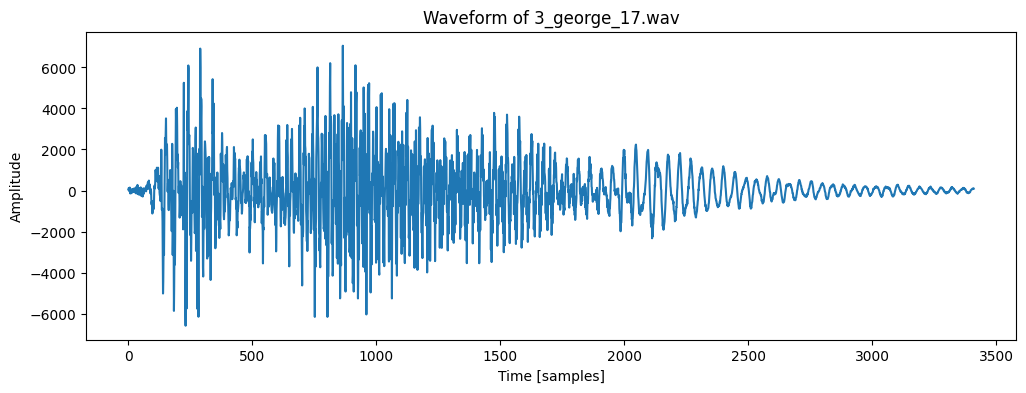

In [6]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Redefining the function with the necessary imports
def load_and_display_audio_wave(file_path):
    with wave.open(file_path, 'r') as wav_file:
        # Extracting parameters
        n_channels, sampwidth, framerate, n_frames, comptype, compname = wav_file.getparams()
        duration = n_frames / framerate
        # Reading frames and converting to waveform
        signal = wav_file.readframes(n_frames)
        waveform = np.frombuffer(signal, dtype=np.int16)

    # Plotting the waveform
    plt.figure(figsize=(12, 4))
    plt.plot(waveform)
    plt.title(f"Waveform of {os.path.basename(file_path)}")
    plt.xlabel('Time [samples]')
    plt.ylabel('Amplitude')
    plt.show()

    return waveform, framerate, duration

# Now, let's load and display the waveform of the sample audio file again
sample_audio_waveform, sample_framerate, sample_duration = load_and_display_audio_wave(sample_audio_path)


In [7]:
import os

# Function to analyze properties of audio files
def analyze_audio_files(folder_path):
    durations = []
    sampling_rates = []
    file_count = 0

    for file in os.listdir(folder_path):
        if file.endswith('.wav'):
            file_path = os.path.join(folder_path, file)
            with wave.open(file_path, 'r') as wav_file:
                n_frames = wav_file.getnframes()
                framerate = wav_file.getframerate()
                durations.append(n_frames / framerate)
                sampling_rates.append(framerate)
            file_count += 1

    # Calculating average duration and sampling rate
    avg_duration = sum(durations) / file_count
    avg_sampling_rate = sum(sampling_rates) / file_count

    return avg_duration, avg_sampling_rate, file_count

# Analyzing the audio files in the dataset
average_duration, average_sampling_rate, total_files = analyze_audio_files(recordings_folder)

average_duration, average_sampling_rate, total_files


(0.43743433333333226, 8000.0, 3000)

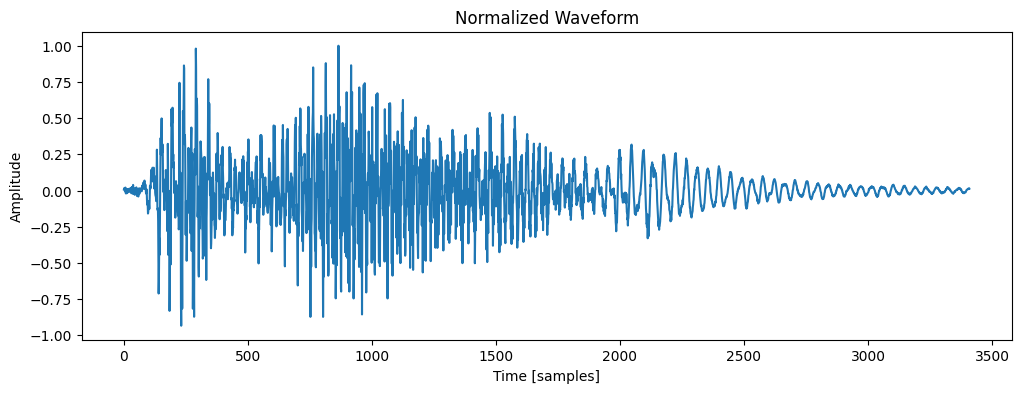

In [8]:
import numpy as np

# Function to normalize an audio waveform
def normalize_waveform(waveform):
    # Normalizing the waveform to the range [-1, 1]
    max_value = np.max(np.abs(waveform))
    normalized_waveform = waveform / max_value if max_value != 0 else waveform
    return normalized_waveform

# Applying normalization to the sample audio file
normalized_sample_waveform = normalize_waveform(sample_audio_waveform)

# Displaying the normalized waveform
plt.figure(figsize=(12, 4))
plt.plot(normalized_sample_waveform)
plt.title("Normalized Waveform")
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.show()


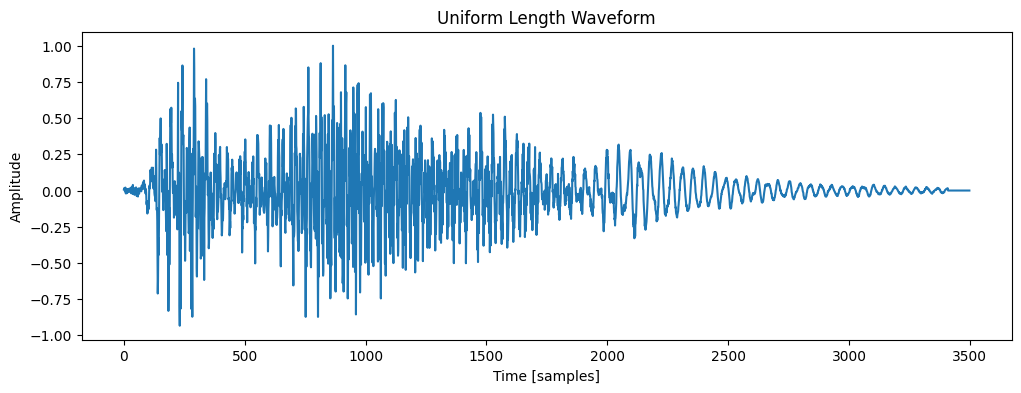

(None, 3499)

In [9]:
# Function to ensure uniform length for audio files
def uniform_length_waveform(waveform, desired_length, sampling_rate):
    current_length = len(waveform)
    if current_length > desired_length:
        # Truncating the waveform if it's longer than the desired length
        waveform = waveform[:desired_length]
    elif current_length < desired_length:
        # Padding the waveform if it's shorter than the desired length
        padding_length = desired_length - current_length
        waveform = np.pad(waveform, (0, padding_length), mode='constant')
    return waveform

# Determining the desired length for the audio files (based on average duration)
# Using the average duration multiplied by the sampling rate to get the length in samples
desired_length_samples = int(average_duration * sample_framerate)

# Applying uniform length to the sample audio waveform
uniform_sample_waveform = uniform_length_waveform(normalized_sample_waveform, desired_length_samples, sample_framerate)

# Displaying the uniform length waveform
plt.figure(figsize=(12, 4))
plt.plot(uniform_sample_waveform)
plt.title("Uniform Length Waveform")
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.show(), desired_length_samples


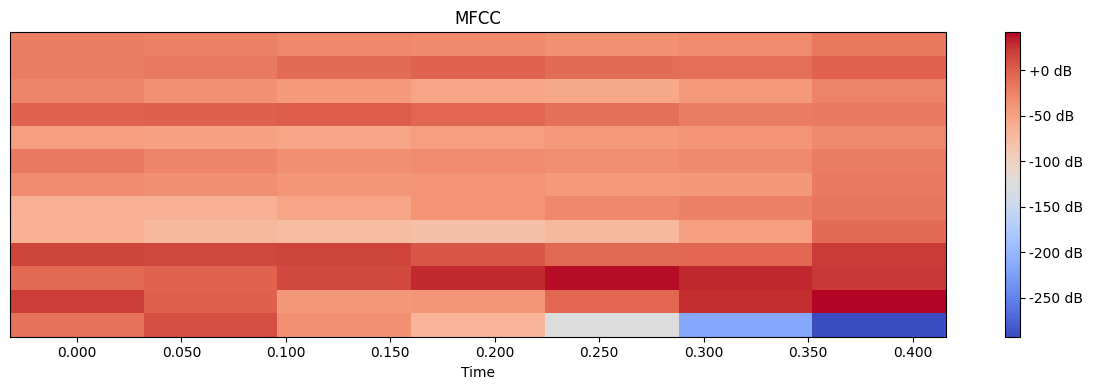

In [10]:
import librosa

# Function to extract MFCC features from an audio waveform
def extract_mfcc_features(waveform, sampling_rate, n_mfcc=13):
    # Extracting MFCC features
    mfcc_features = librosa.feature.mfcc(y=waveform, sr=sampling_rate, n_mfcc=n_mfcc)
    return mfcc_features

# Extracting MFCC features from the uniform length sample waveform
mfcc_features_sample = extract_mfcc_features(uniform_sample_waveform, sample_framerate)

# Displaying the MFCC features
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc_features_sample, sr=sample_framerate, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()


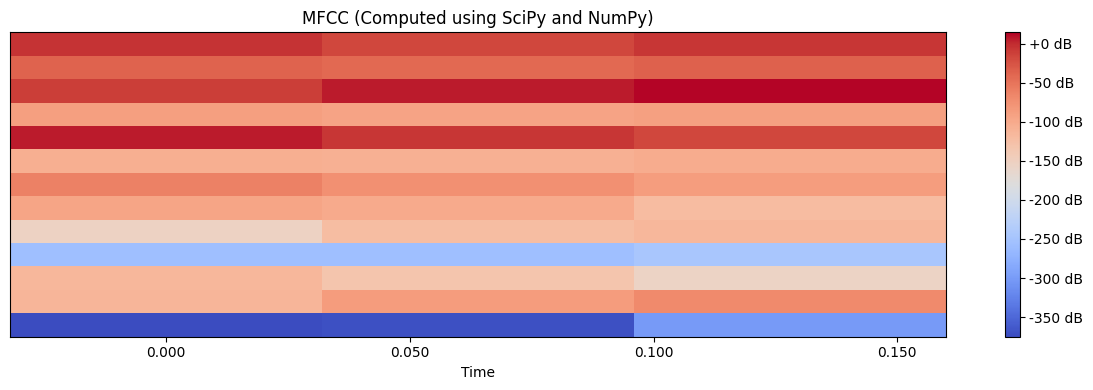

In [12]:
from scipy.signal import get_window
from numpy.fft import rfft

# Function to compute MFCC using numpy and scipy
def compute_mfcc_scipy(waveform, sample_rate, num_ceps=13, n_fft=2048, hop_length=512, n_mels=128):
    # Pre-emphasis filter
    pre_emphasis = 0.97
    emphasized_signal = np.append(waveform[0], waveform[1:] - pre_emphasis * waveform[:-1])

    # Framing
    frame_length, frame_step = n_fft, hop_length
    signal_length = len(emphasized_signal)
    num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))

    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_length))
    pad_signal = np.append(emphasized_signal, z)

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]

    # Window
    frames *= get_window("hann", frame_length, fftbins=True)

    # FFT and Power Spectrum
    mag_frames = np.absolute(rfft(frames, n_fft))
    pow_frames = ((1.0 / n_fft) * ((mag_frames) ** 2))

    # Mel-filterbanks
    low_freq_mel = 0
    high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, n_mels + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin = np.floor((n_fft + 1) * hz_points / sample_rate)

    fbank = np.zeros((n_mels, int(np.floor(n_fft / 2 + 1))))
    for m in range(1, n_mels + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
    filter_banks = 20 * np.log10(filter_banks)  # dB

    # DCT to get MFCCs
    mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)]  # Keep 2-13

    return mfcc

# Extracting MFCC features for the sample audio file
mfcc_features_scipy = compute_mfcc_scipy(uniform_sample_waveform, sample_framerate)

# Displaying the MFCC features
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc_features_scipy.T, sr=sample_framerate, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC (Computed using SciPy and NumPy)')
plt.tight_layout()
plt.show()


In [13]:
# Function to process and extract MFCC features for all audio files in a folder
def process_all_audio_files(folder_path, sample_rate, desired_length, num_ceps=13):
    all_mfcc_features = []

    for file in os.listdir(folder_path):
        if file.endswith('.wav'):
            file_path = os.path.join(folder_path, file)
            with wave.open(file_path, 'r') as wav_file:
                # Reading frames and converting to waveform
                signal = wav_file.readframes(wav_file.getnframes())
                waveform = np.frombuffer(signal, dtype=np.int16)

                # Normalizing the waveform
                normalized_waveform = normalize_waveform(waveform)

                # Ensuring uniform length
                uniform_waveform = uniform_length_waveform(normalized_waveform, desired_length, sample_rate)

                # Extracting MFCC features
                mfcc_features = compute_mfcc_scipy(uniform_waveform, sample_rate, num_ceps=num_ceps)
                all_mfcc_features.append(mfcc_features)

    return np.array(all_mfcc_features)

# Processing all audio files in the dataset
all_mfcc_features = process_all_audio_files(recordings_folder, sample_framerate, desired_length_samples)

# Checking the shape of the extracted features array
all_mfcc_features.shape


(3000, 3, 13)



### Clustering the Audio Data

1. **Data Preparation for Clustering**:
   - **Flatten the Features**: Since clustering algorithms typically require a 2D input (samples x features), you should reshape the data accordingly.
   - **Standardization**: Standardize the features to ensure that each feature contributes equally to the distance calculations.

2. **Choosing a Clustering Algorithm**:
   - Common choices for clustering include K-means, Hierarchical clustering, and DBSCAN. Given the nature of the data, K-means is a straightforward and effective option to start with.

3. **Determining the Number of Clusters**:
   - Use methods like the Elbow method, the Silhouette score, or the Davies-Bouldin index to estimate the optimal number of clusters.

4. **Applying the Clustering Algorithm**:
   - Implement the chosen algorithm on the prepared dataset.

5. **Evaluation and Analysis**:
   - Evaluate the clustering results using appropriate metrics.
   - Analyze the clusters to understand what each cluster represents (e.g., specific digits, speaker characteristics).

6. **Visualization**:
   - Visualize the clustering results, if feasible, to gain better insights.


In [14]:
mfcc_features_flat = all_mfcc_features.reshape(all_mfcc_features.shape[0], -1)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mfcc_features_standardized = scaler.fit_transform(mfcc_features_flat)


In [16]:
from sklearn.cluster import KMeans
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(mfcc_features_standardized)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(mfcc_features_standardized, clusters)
print(f"Average Silhouette Score: {silhouette_avg}")


Average Silhouette Score: 0.14417325733275485


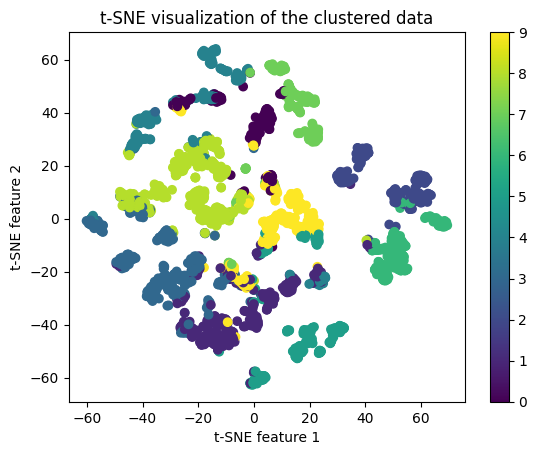

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
mfcc_tsne = tsne.fit_transform(mfcc_features_standardized)

# Plotting
plt.scatter(mfcc_tsne[:, 0], mfcc_tsne[:, 1], c=clusters)
plt.title("t-SNE visualization of the clustered data")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.colorbar()
plt.show()


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
mfcc_pca = pca.fit_transform(mfcc_features_standardized)


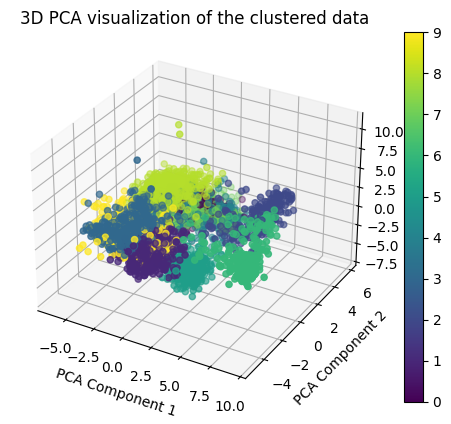

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], mfcc_pca[:, 2], c=clusters, cmap='viridis')

ax.set_title("3D PCA visualization of the clustered data")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.colorbar(scatter)
plt.show()
